# *Dataset Information*

This dataset contains information about flights performance in the US in 2013. Analysis on this data was carried out to analyze possible factors that affect delays in departure or arrival of a flight.

In [1]:
# Dataset - https://www.kaggle.com/datasets/mahoora00135/flight.csv

## What to look out for in this dataset

### Find out which Airline has the most Flights.
### Find out the Average Delay from Airports.
### Find out Early Arrival Performance of Airports
### Find out the Relationship between Delay in Departure and Delay in Arrival

In [3]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Importing Seaborn
import seaborn as sns

In [4]:
# Loading Dataset
flight = pd.read_csv("flights.csv")
flight.head() 

,id,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,...,flight,tailnum,origin,dest,air_time,distance,hour,minute,time_hour,name
0,0,2013,1,1,517.0,515,2.0,830.0,819,11.0,...,1545,N14228,EWR,IAH,227.0,1400,5,15,2013-01-01 05:00:00,United Air Lines Inc.
1,1,2013,1,1,533.0,529,4.0,850.0,830,20.0,...,1714,N24211,LGA,IAH,227.0,1416,5,29,2013-01-01 05:00:00,United Air Lines Inc.
2,2,2013,1,1,542.0,540,2.0,923.0,850,33.0,...,1141,N619AA,JFK,MIA,160.0,1089,5,40,2013-01-01 05:00:00,American Airlines Inc.
3,3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,...,725,N804JB,JFK,BQN,183.0,1576,5,45,2013-01-01 05:00:00,JetBlue Airways
4,4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,...,461,N668DN,LGA,ATL,116.0,762,6,0,2013-01-01 06:00:00,Delta Air Lines Inc.


## Cleaning Dataset

In [5]:
# Drop columns 

flight = flight.drop(columns= ['time_hour', 'flight', 'id'])
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,tailnum,origin,dest,air_time,distance,hour,minute,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,N14228,EWR,IAH,227.0,1400,5,15,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,N24211,LGA,IAH,227.0,1416,5,29,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,N619AA,JFK,MIA,160.0,1089,5,40,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,N804JB,JFK,BQN,183.0,1576,5,45,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,N668DN,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.


In [6]:
f_rows, f_columns = flight.shape

print("Total number of rows = ", f_rows)
print("Total number of columns = ", f_columns)

Total number of rows =  336776
Total number of columns =  18


We have a total of 18 columns. They are defined below as:

* Year: The year which the flight took place
* Month: The month which the flight took place
* Day: The day of which the flight departed
* Dep_time: The time of which the flight departed
* Sched_dep_time: The scheduled departure time of the fligt
* Dep_delay: The number of minutes departure was delayed
* Arr_time: The time of which the flight arrived at its destination
* Sched_arr_time: The scheduled arrival time of the flight
* Arr_delay: The number of minutes arrival was delayed
* Carrier: The two-letter abbreviation for the airline carrier of the flight
* Tailnum: The unique identifier of the aircraft used for the flight
* Origin: The three-letter code of the airport of origin of the flight
* Dest: The destination airport for the flight
* Air_time: The duration of the flight in minutes
* Distance: The distance between the origin and destination airports, in miles
* Hour: The total hour of the scheduled departure time, in local time.
* Minutes: The total minutes of the scheduled departure time, in local time.
* Name: The name of the airline carrier for the flight.

In [7]:
## Viewing Data Columns

for x in flight.columns:
  print(x)

year
month
day
dep_time
sched_dep_time
dep_delay
arr_time
sched_arr_time
arr_delay
carrier
tailnum
origin
dest
air_time
distance
hour
minute
name


In [8]:
flight.isnull().sum()

year                 0
month                0
day                  0
dep_time          8255
sched_dep_time       0
dep_delay         8255
arr_time          8713
sched_arr_time       0
arr_delay         9430
carrier              0
tailnum           2512
origin               0
dest                 0
air_time          9430
distance             0
hour                 0
minute               0
name                 0
dtype: int64

We could go ahead and drop the null values as they are not essential for this analysis

In [9]:
# Dropping Null Values
flight.dropna(inplace=True, subset=['dep_time', 'dep_delay', 'arr_time', 'arr_delay', 'tailnum', 'air_time'])

In [10]:
## Checking for Null/Empty Values Again

flight.isnull().sum()

year              0
month             0
day               0
dep_time          0
sched_dep_time    0
dep_delay         0
arr_time          0
sched_arr_time    0
arr_delay         0
carrier           0
tailnum           0
origin            0
dest              0
air_time          0
distance          0
hour              0
minute            0
name              0
dtype: int64

In [11]:
# Checking Dataset Information
flight.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 327346 entries, 0 to 336769
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   year            327346 non-null  int64  
 1   month           327346 non-null  int64  
 2   day             327346 non-null  int64  
 3   dep_time        327346 non-null  float64
 4   sched_dep_time  327346 non-null  int64  
 5   dep_delay       327346 non-null  float64
 6   arr_time        327346 non-null  float64
 7   sched_arr_time  327346 non-null  int64  
 8   arr_delay       327346 non-null  float64
 9   carrier         327346 non-null  object 
 10  tailnum         327346 non-null  object 
 11  origin          327346 non-null  object 
 12  dest            327346 non-null  object 
 13  air_time        327346 non-null  float64
 14  distance        327346 non-null  int64  
 15  hour            327346 non-null  int64  
 16  minute          327346 non-null  int64  
 17  name      

In [12]:
# Dataset Observation
flight.describe()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,air_time,distance,hour,minute
count,327346.0,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000,327346.000000
mean,2013.0,6.564803,15.740825,1348.789883,1340.335098,12.555156,1501.908238,1532.788426,6.895377,150.686460,1048.371314,13.141010,26.234116
std,0.0,3.413444,8.777376,488.319979,467.413156,40.065688,532.888731,497.979124,44.633292,93.688305,735.908523,4.662063,19.295918
min,2013.0,1.000000,1.000000,1.000000,500.000000,-43.000000,1.000000,1.000000,-86.000000,20.000000,80.000000,5.000000,0.000000
25%,2013.0,4.000000,8.000000,907.000000,905.000000,-5.000000,1104.000000,1122.000000,-17.000000,82.000000,509.000000,9.000000,8.000000
50%,2013.0,7.000000,16.000000,1400.000000,1355.000000,-2.000000,1535.000000,1554.000000,-5.000000,129.000000,888.000000,13.000000,29.000000
75%,2013.0,10.000000,23.000000,1744.000000,1729.000000,11.000000,1940.000000,1944.000000,14.000000,192.000000,1389.000000,17.000000,44.000000
max,2013.0,12.000000,31.000000,2400.000000,2359.000000,1301.000000,2400.000000,2359.000000,1272.000000,695.000000,4983.000000,23.000000,59.000000


In [13]:
flight.head()

,year,month,day,dep_time,sched_dep_time,dep_delay,arr_time,sched_arr_time,arr_delay,carrier,tailnum,origin,dest,air_time,distance,hour,minute,name
0,2013,1,1,517.0,515,2.0,830.0,819,11.0,UA,N14228,EWR,IAH,227.0,1400,5,15,United Air Lines Inc.
1,2013,1,1,533.0,529,4.0,850.0,830,20.0,UA,N24211,LGA,IAH,227.0,1416,5,29,United Air Lines Inc.
2,2013,1,1,542.0,540,2.0,923.0,850,33.0,AA,N619AA,JFK,MIA,160.0,1089,5,40,American Airlines Inc.
3,2013,1,1,544.0,545,-1.0,1004.0,1022,-18.0,B6,N804JB,JFK,BQN,183.0,1576,5,45,JetBlue Airways
4,2013,1,1,554.0,600,-6.0,812.0,837,-25.0,DL,N668DN,LGA,ATL,116.0,762,6,0,Delta Air Lines Inc.


## Flight Analysis & Visualization

In [14]:
flight_delay_count = flight['dep_delay'].value_counts()
print(flight_delay_count)

-5.0      24765
-4.0      24557
-3.0      24158
-2.0      21463
-6.0      20649
          ...  
 545.0        1
 443.0        1
 800.0        1
 911.0        1
 422.0        1
Name: dep_delay, Length: 526, dtype: int64


In [15]:
flight_delay_count2 =flight['arr_delay'].value_counts()
print(flight_delay_count2)

-13.0      7177
-10.0      7088
-12.0      7046
-14.0      6975
-11.0      6863
           ... 
 435.0        1
 456.0        1
 428.0        1
 516.0        1
 1007.0       1
Name: arr_delay, Length: 577, dtype: int64


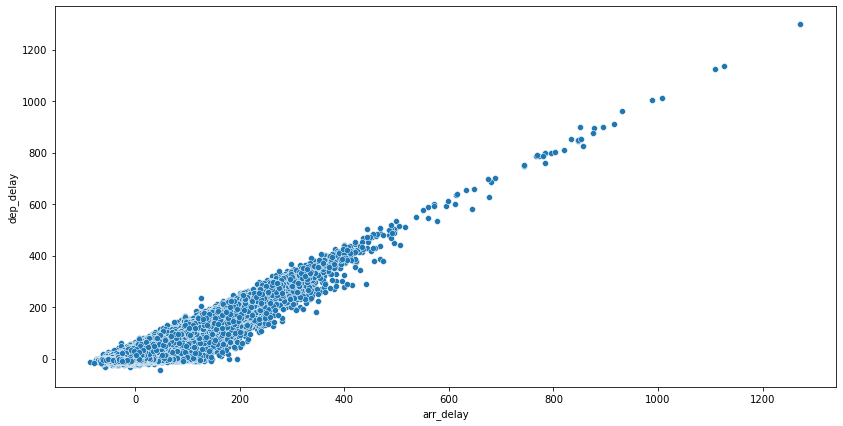

In [16]:
# Using Scatterplot to check delay in arrival and departure
arrival_delay = flight['arr_delay']
departure_delay = flight['dep_delay']

plt.rcParams['figure.figsize'] = (14, 7)

sns.scatterplot(x=arrival_delay, 
                y=departure_delay
)
plt.show()

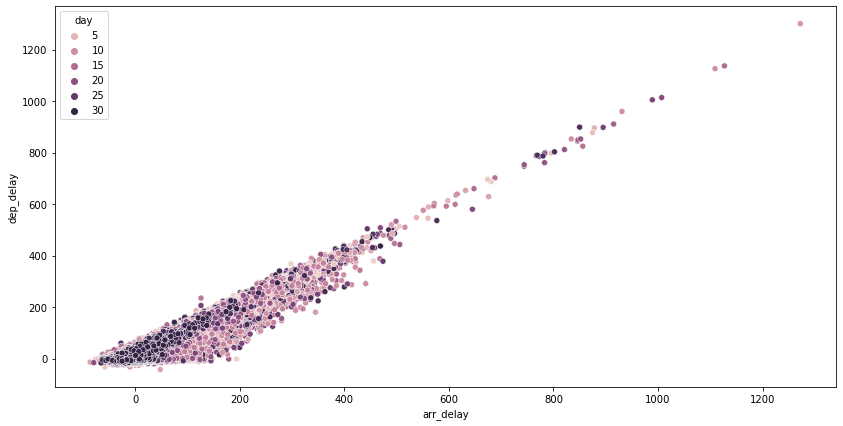

In [17]:
# Checking for correlation between departure and arrival delay and the day most delays occured

sns.scatterplot(
    data=flight,
    x='arr_delay',
    y='dep_delay',
    hue='day'
)
plt.show()

From the above plots, the delay in arrival occures when flights delay in movement and most delays happened on the 5th day. That is departure delay has a positive relationship with arrival delay

In [18]:
# Number of scheduled departures planned by airlines in 2013
airline_count =flight['name'].value_counts()
print(airline_count)

United Air Lines Inc.          57782
JetBlue Airways                54049
ExpressJet Airlines Inc.       51108
Delta Air Lines Inc.           47658
American Airlines Inc.         31947
Envoy Air                      25037
US Airways Inc.                19831
Endeavor Air Inc.              17294
Southwest Airlines Co.         12044
Virgin America                  5116
AirTran Airways Corporation     3175
Alaska Airlines Inc.             709
Frontier Airlines Inc.           681
Mesa Airlines Inc.               544
Hawaiian Airlines Inc.           342
SkyWest Airlines Inc.             29
Name: name, dtype: int64


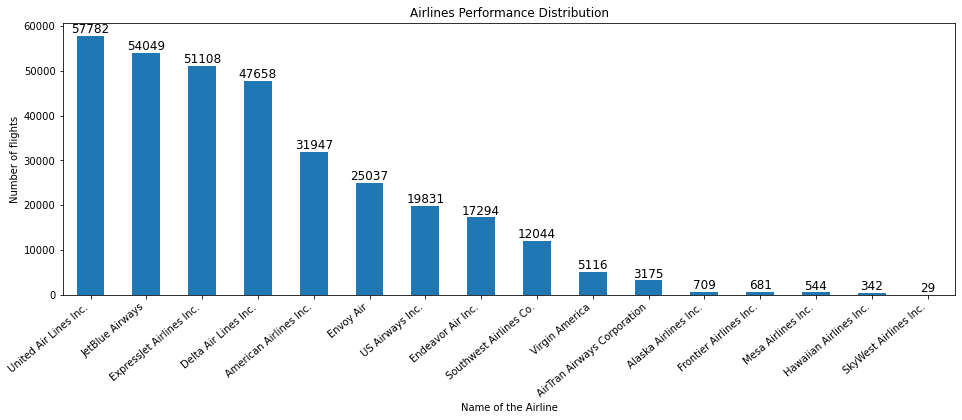

In [19]:
plt.figure(figsize=(16,5))

ax = flight["name"].value_counts().plot(
             kind="bar"
)


plt.title("Airlines Performance Distribution")
plt.xlabel("Name of the Airline")
plt.xticks(rotation=40, ha='right')
plt.ylabel("Number of flights")
ax.bar_label(ax.containers[0], fontsize=12)
plt.show()

United Air Lines Inc has the most flight

Three airports amongst other airports in the dataset seems to experience most delays both in departure and arrival.The Newark International Airport(EWR) has the highest number of delays compared to New York, John F Kennedy International Airport (JFK) and New York, La Guardia Airport(LGA). They all seem to be the most busiest airports in New York.

Early Arrival Perfomance of Airports

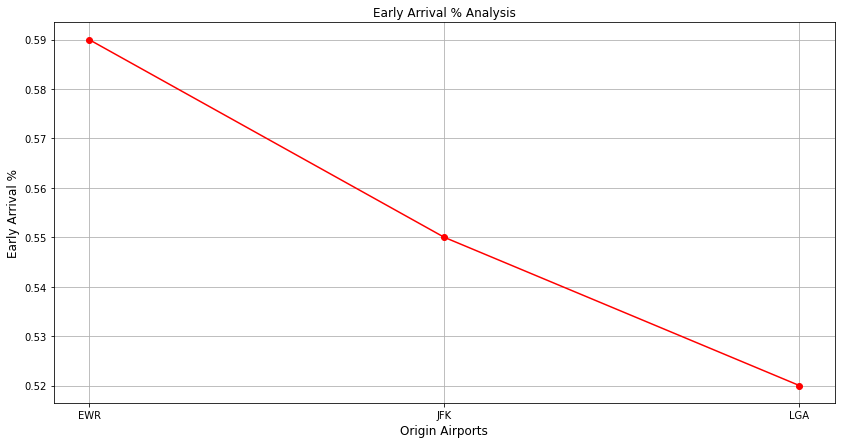

In [21]:
ea=(flight[flight["arr_delay"]==0].groupby("origin").count()).loc[:, "year":"month"]
EarlyArrPerf=np.round(((ea["year"]/ flight["month"].count() ) * 100), decimals=2)


plt.plot(EarlyArrPerf, marker='o', color='r')

plt.ylabel('Early Arrival %', fontsize=12)
plt.xlabel('Origin Airports', fontsize=12)

# title
plt.title('Early Arrival % Analysis')

# Grid
plt.grid(True)
plt.show()

Despite being one of the busiest Airport, The Newark International Airport(EWR) has the maximum number of flights taking off and high departure time, they have maintained a good early arrival performance unlike their counterparts. 
I would recommend they review their departure schedule time to help reduce departure delays.

In conclusion, analysis have been carried out on these few mentioned points for easy understanding of the dataset

1. Number of Airline that has the most flights?
2. Average delay from airports
3. Early arrival performance of Airports
4. The relationship between delay in departure and delay in arrival